In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

c:\Users\Emy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0, 0.5, 'Y')

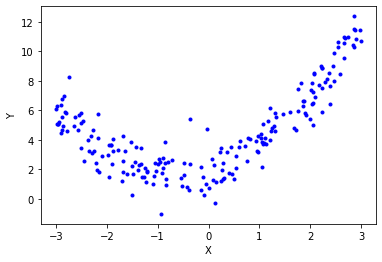

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.3784354019027655


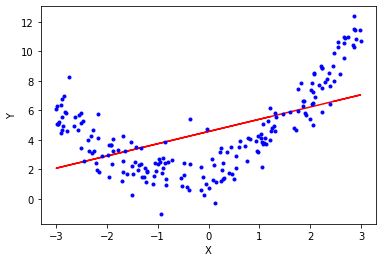

In [6]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [7]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8405868971980119


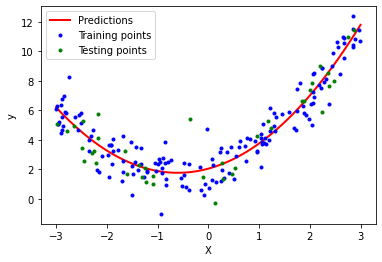

In [8]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [9]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.93175633 0.77077635]]
[2.0530594]


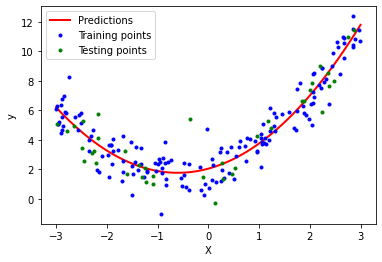

In [10]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    print(lin_reg.coef_)
    print(lin_reg.intercept_)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

[[ 8.64953640e-01  6.98275416e+01 -5.19019415e+02 -5.25406606e+03
   4.12292759e+04  1.59677556e+05 -1.34414374e+06 -2.00140240e+06
   2.49992521e+07 -1.48994561e+06 -3.02493151e+08  3.85850273e+08
   2.55654079e+09 -5.83541372e+09 -1.57381100e+10  4.86448657e+10
   7.22040334e+10 -2.64783242e+11 -2.48318783e+11  9.85496251e+11
   6.30539134e+11 -2.49962145e+12 -1.12284981e+12  4.07405618e+12
   1.20303722e+12 -3.41082467e+12 -2.64230855e+11 -5.26166837e+11
  -1.15422164e+12  3.47053492e+12  1.20031072e+12 -5.66347556e+11
   3.85699279e+11 -3.30113579e+12 -8.13032113e+11  5.79618844e+11
  -6.42729877e+11  2.47406363e+12  5.57226656e+11  1.10343545e+12
   7.06278118e+11 -2.08327040e+12  4.29163780e+11 -1.65666747e+12
  -9.91511016e+11 -9.89408823e+10 -8.16052237e+11  1.68771437e+12
  -9.70668055e+10  1.60279057e+12  1.17888531e+12  1.85429928e+11
   8.34961133e+11 -1.65090097e+12  1.01308436e+11 -1.63440303e+12
  -1.10234742e+12 -1.30568970e+11 -1.12972626e+12  8.96615926e+11
  -1.17083

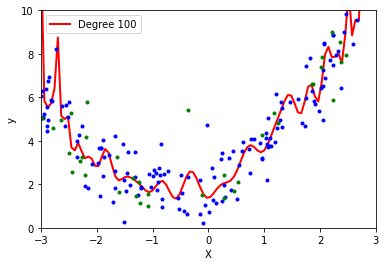

In [38]:
polynomial_regression(100)

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
# instantiating the lasso regression model
lasso = Lasso(alpha=10)


# instantiation, training and inference
ridge = Ridge(alpha=100)


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = Lasso(alpha=0.2)
    
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    print(lin_reg.coef_)
    print(lin_reg.intercept_)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

[ 1.51226913  1.92841953  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.         

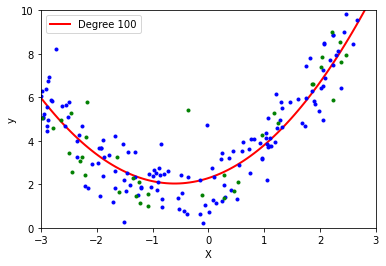

In [55]:
polynomial_regression(100)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = Ridge(alpha=0.1)
    
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    print(lin_reg.coef_)
    print(lin_reg.intercept_)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

[[ 1.78525183e+00  2.97893681e+00  2.26260634e-01 -1.82739641e+00
  -5.12284336e-01 -4.34233172e-01 -2.19536706e-02  5.72510051e-01
   1.56749881e-01  9.44696557e-01  9.97219323e-02  9.23546135e-01
  -2.13650643e-03  7.07762512e-01 -7.00908887e-02  4.22772327e-01
  -9.38121092e-02  1.40525477e-01 -8.58342002e-02 -1.01792587e-01
  -6.10234743e-02 -2.88627466e-01 -3.04126005e-02 -4.17297307e-01
  -6.88004661e-04 -4.92258663e-01  2.47355854e-02 -5.21435147e-01
   4.45358462e-02 -5.13947436e-01  5.85939838e-02 -4.78783633e-01
   6.74143216e-02 -4.24086958e-01  7.17745139e-02 -3.56836083e-01
   7.25267432e-02 -2.82764406e-01  7.04912217e-02 -2.06415544e-01
   6.64038971e-02 -1.31268438e-01  6.08951491e-02 -5.98904412e-02
   5.44857900e-02  5.90630630e-03  4.75924160e-02  6.49187879e-02
   4.05374927e-02  1.16423824e-01  3.35614819e-02  1.60067795e-01
   2.68354323e-02  1.95775096e-01  2.04731183e-02  2.23673776e-01
   1.45422136e-02  2.44036196e-01  9.07423997e-03  2.57232453e-01
   4.07319

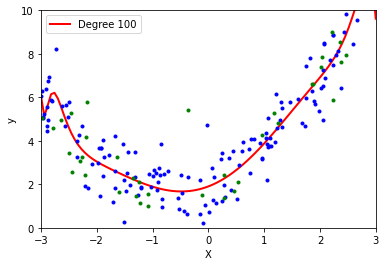

In [41]:
polynomial_regression(100)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = ElasticNet(alpha=0.1)
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    print(lin_reg.coef_)
    print(lin_reg.intercept_)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

[ 1.36237089  1.51685399  0.27340539  0.56104201  0.          0.
  0.          0.          0.          0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.04798986
  0.        ]
[4.51368721]


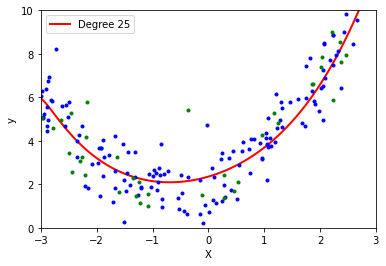

In [45]:
polynomial_regression(25)